# Studente Performance EDA

### Machine Learning Project Lifecycle

- Problem understanding
- Data Collection
- Data checks to peform
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose best model

### 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Importing libs and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/stud.csv')

### Showing 5 top rows of the dataset

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset information:
- gender: The gender of the students `'male', 'female'`
- race_ethinicity: Ethinicity of the students `'group A', 'B', 'C', 'D', 'E'`
- parental_level_of_education: Parents final education `'bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school'`
- lunch: Having lunch befoe the test.
- test_preparation_course: Complete or not complete before the test
- Math score
- Reading Score
- Writing Score

### 3) Data checks to peform:
- Check missing values
- Check duplicates
- Check data types
- Check the numbers of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categorical column

#### 3.1 Check missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in this dataset

#### 3.2 Check duplicates

In [5]:
df.duplicated().sum()

0

There are no duplicated values in this dataset

#### 3.3 Check the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the numbers of unique values of each column


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of the dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights:**
- The mean of the tests are close to each other
- The standard deviation are close to each other as well
- The only test that have minimum score 0 is math.

#### 3.6 Check various categories present in the different categorical column

In [18]:
for column in df.select_dtypes(include='object').columns:
    print(f'The "{column}" column has the following categories:')
    print(f'{df[column].unique()}\n')


The "gender" column has the following categories:
['female' 'male']

The "race_ethnicity" column has the following categories:
['group B' 'group C' 'group A' 'group D' 'group E']

The "parental_level_of_education" column has the following categories:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

The "lunch" column has the following categories:
['standard' 'free/reduced']

The "test_preparation_course" column has the following categories:
['none' 'completed']



#### 3.8 Create new columns: Total Score and Average Score

In [21]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = round(df['total_score']/3,2)

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


Verifying the numbers of students that had full marks and marks below 20:

In [26]:
for col in df[['math_score','writing_score','reading_score']]:
    max_score_number_stu = df[df[col] == 100]['average_score'].count()
    print(f'Number of students with max {col}: {max_score_number_stu}')
    below_score_number_stu = df[df[col] <= 20]['average_score'].count()
    print(f'Number of students below 20 marks in {col}: {below_score_number_stu}')
    print('\n')

Number of students with max math_score: 7
Number of students below 20 marks in math_score: 4


Number of students with max writing_score: 14
Number of students below 20 marks in writing_score: 3


Number of students with max reading_score: 17
Number of students below 20 marks in reading_score: 1




**Insights:**
- Math test is the test that have less students with max scores
- Math test is the test that have more students with grades below 20 marks.

#### 4) Exploring data

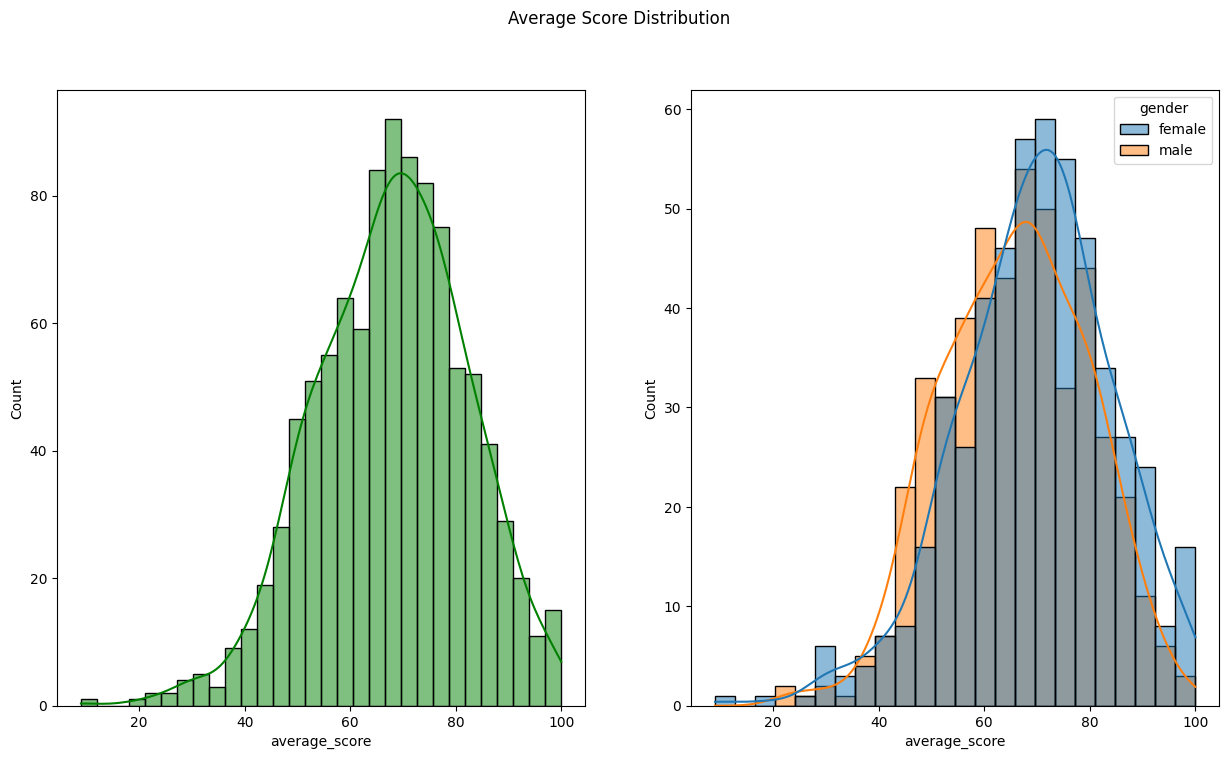

In [34]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.suptitle('Average Score Distribution')
plt.subplot(121)
sns.histplot(data= df, x='average_score', bins= 30, kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data= df, x='average_score', kde= True, hue='gender')
plt.show()

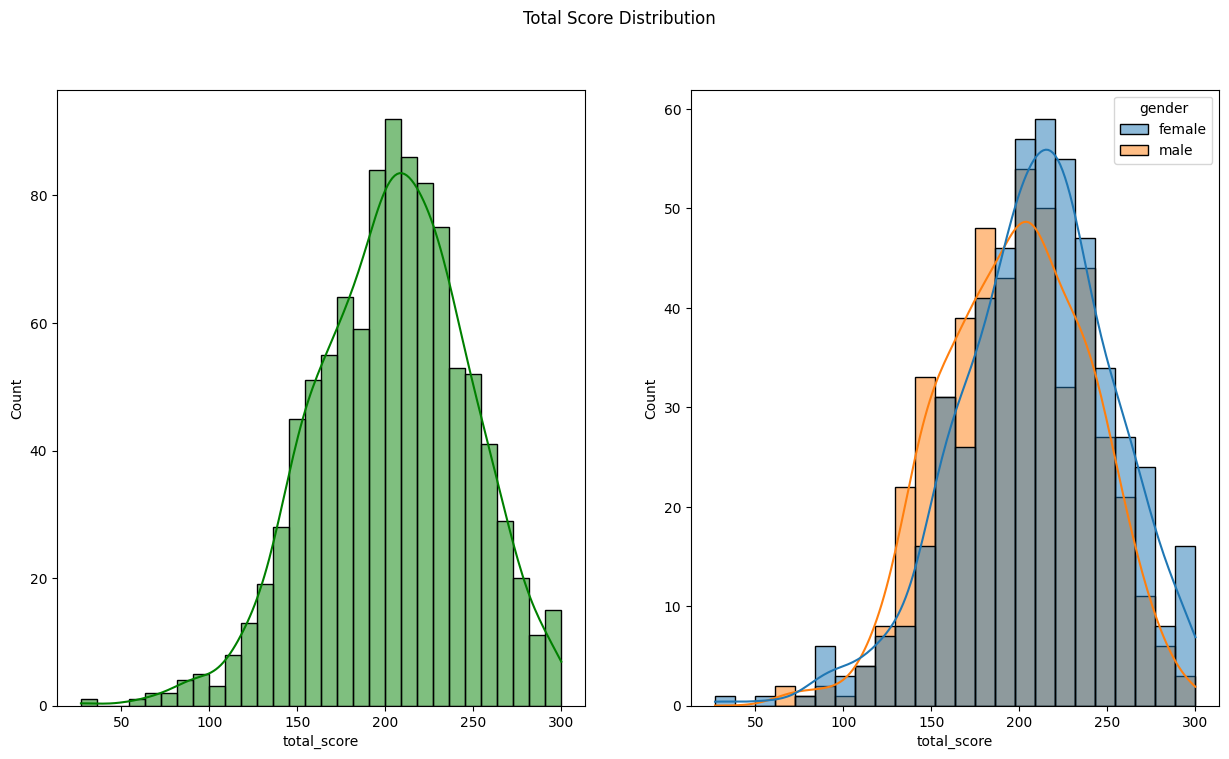

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.suptitle('Total Score Distribution')
plt.subplot(121)
sns.histplot(data= df, x='total_score', bins= 30, kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data= df, x='total_score', kde= True, hue='gender')
plt.show()

**Insights:**
- Female students tend to perform better than the male ones

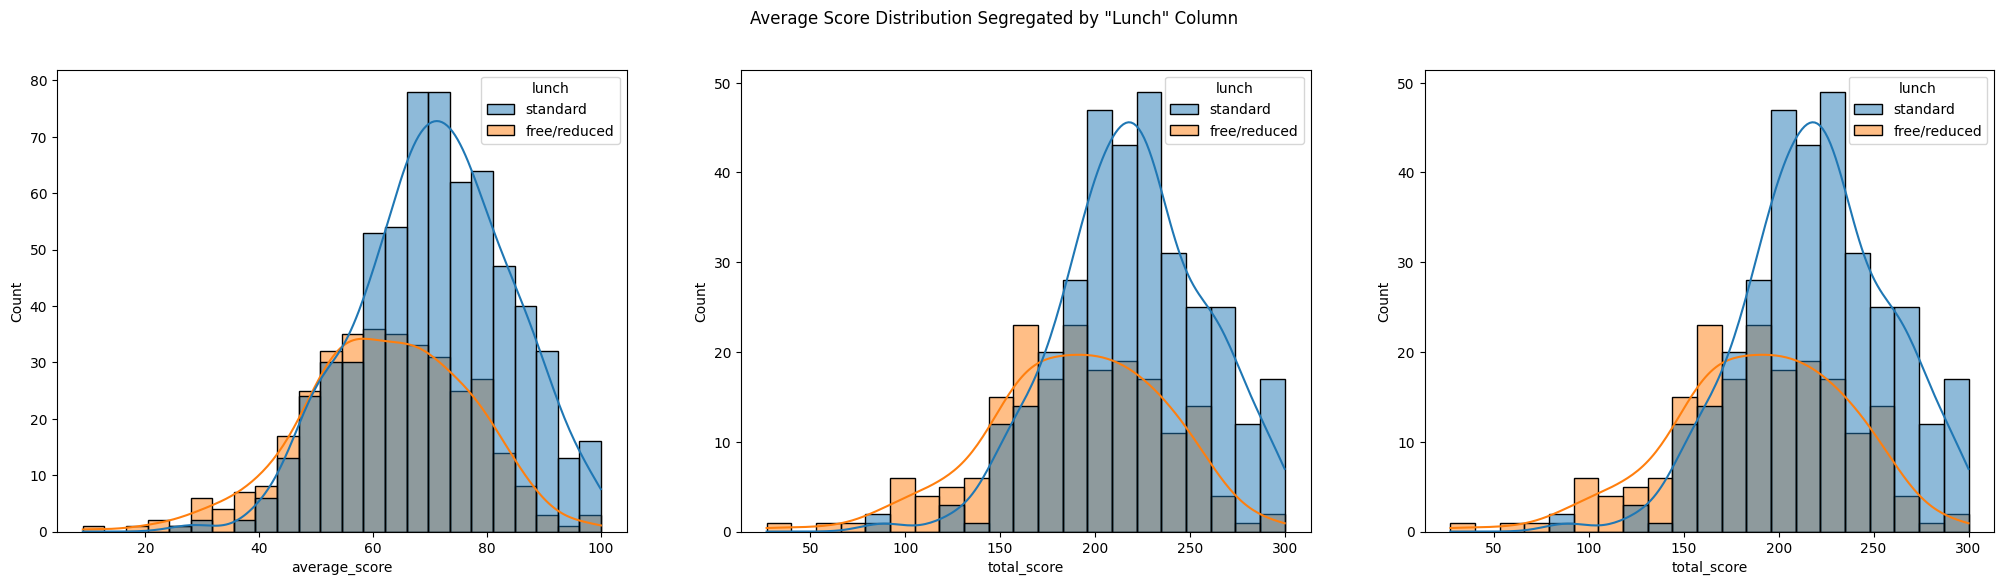

In [45]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.suptitle('Average Score Distribution Segregated by "Lunch" Column')
plt.subplot(131)
sns.histplot(data= df, x='average_score', kde= True, hue='lunch')
plt.subplot(132)
sns.histplot(data= df[df.gender == 'female'], x='total_score', kde= True, hue='lunch')
plt.subplot(133)
sns.histplot(data= df[df.gender == 'female'], x='total_score', kde= True, hue='lunch')
plt.show()

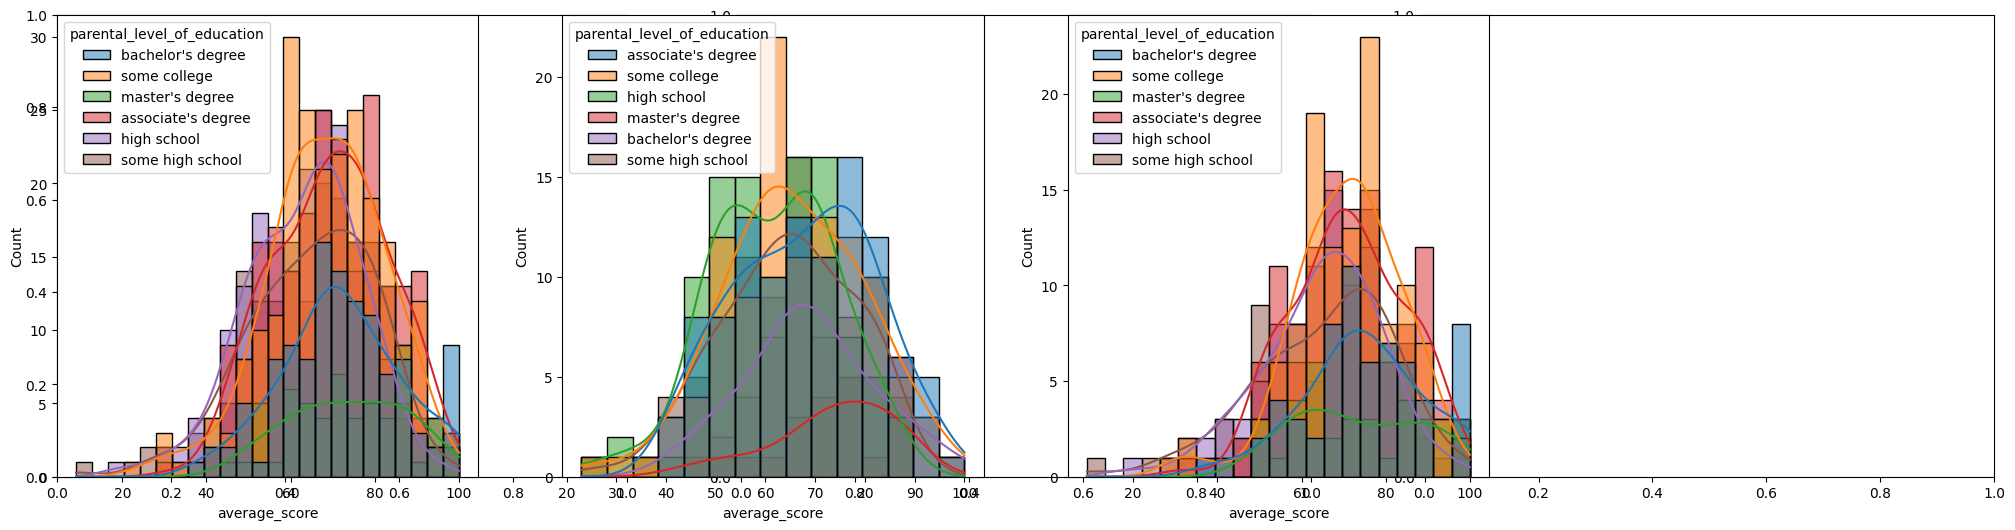

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

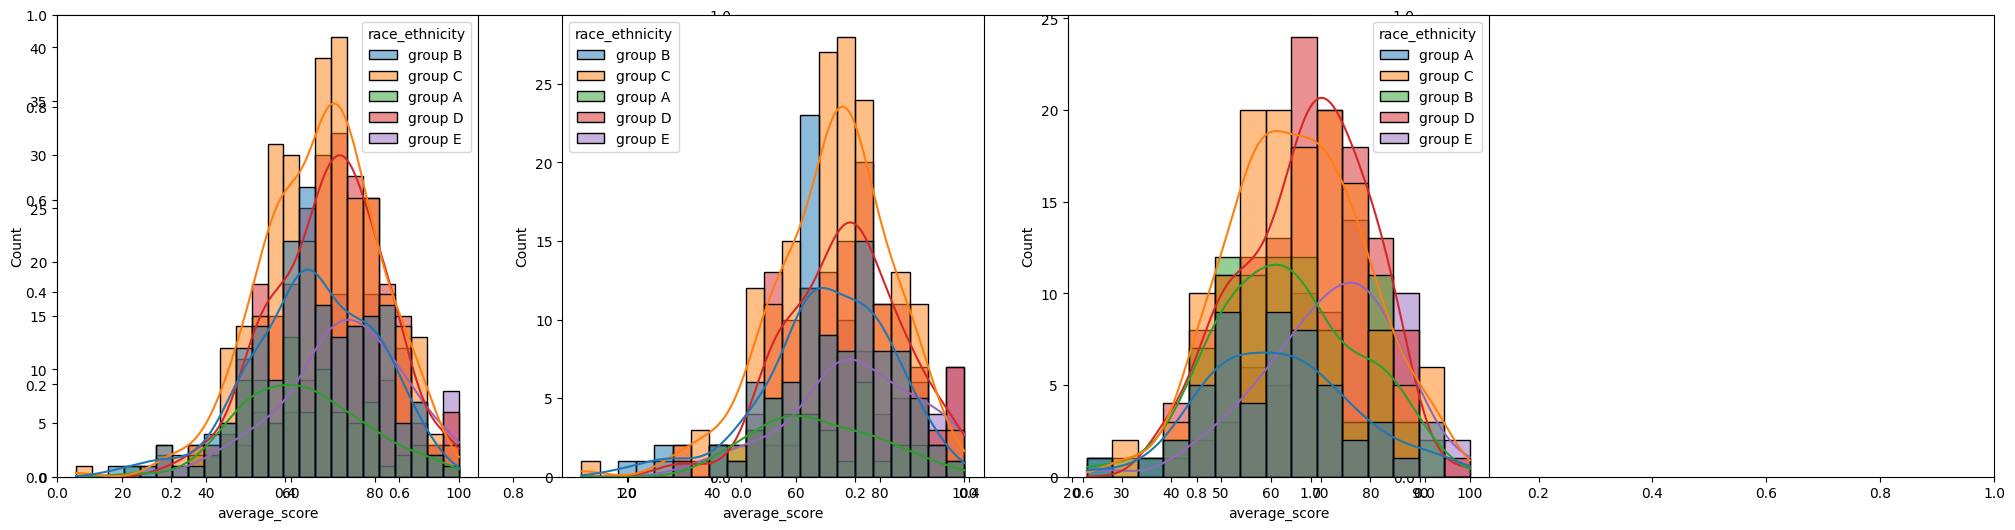

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

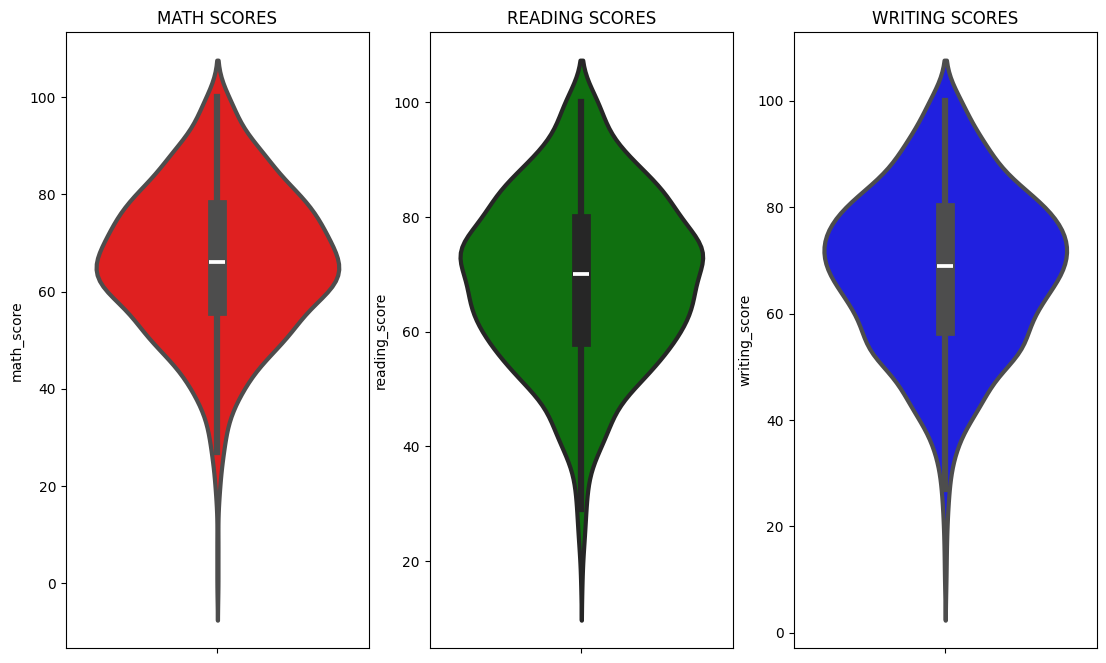

In [50]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

4.3 Multivariate analysis using pieplot


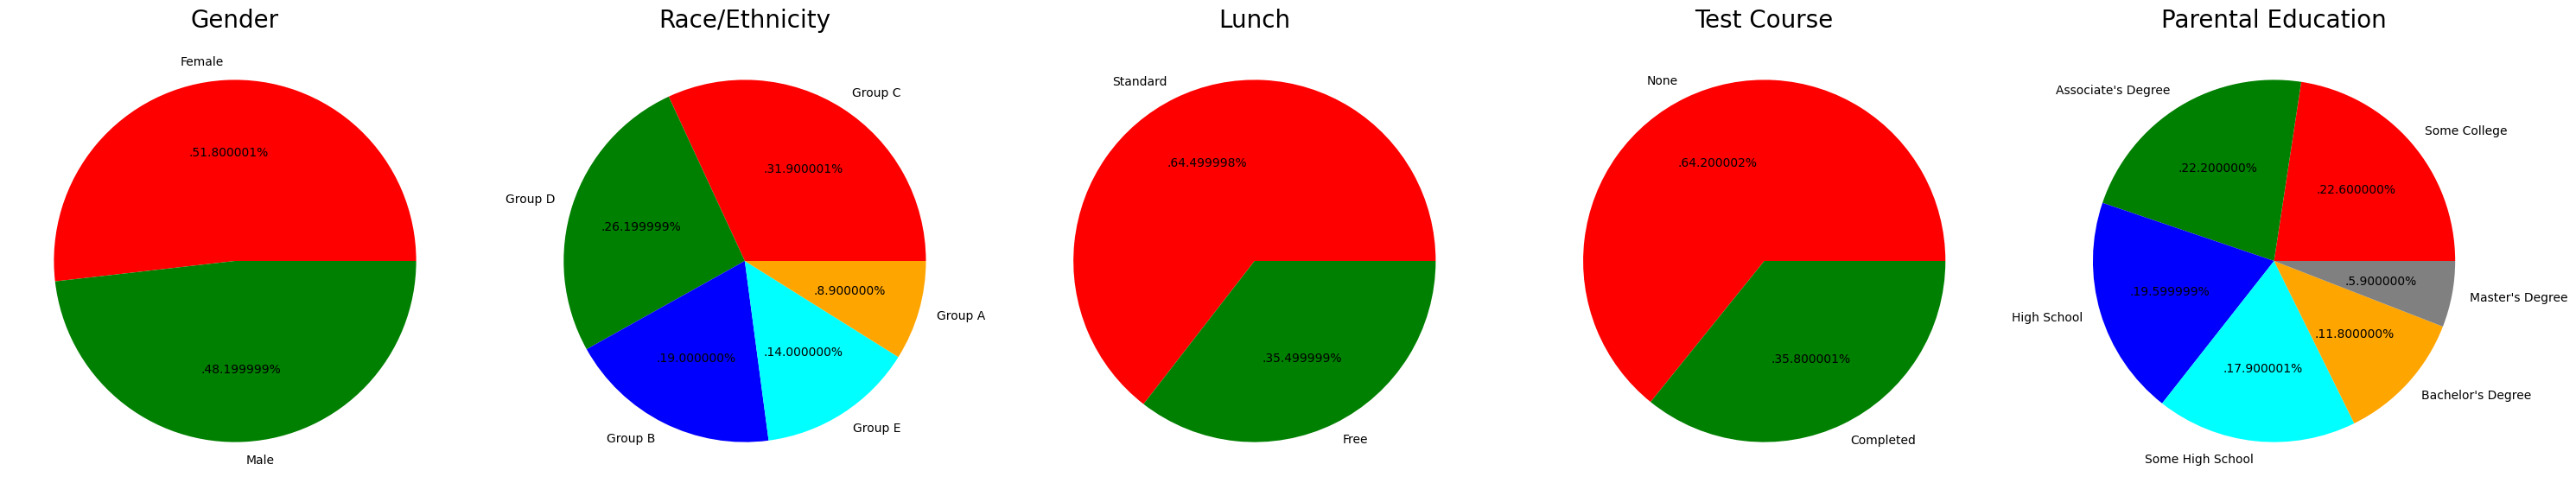

In [51]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [59]:
gender_group = df.groupby('gender').mean(numeric_only=True)

gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


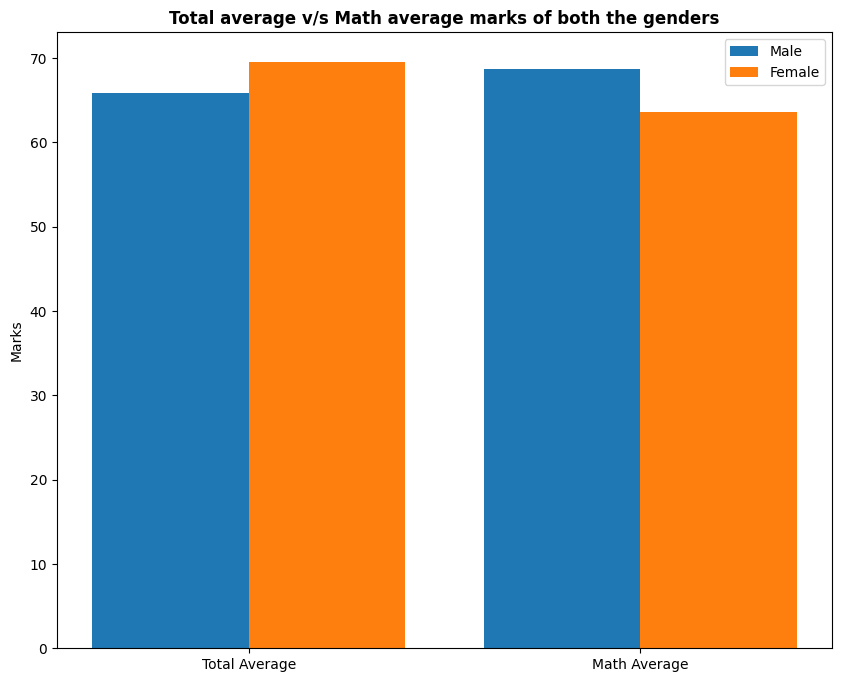

In [60]:

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()